### Comparing Spearman and Pearson Correlations

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import *

%matplotlib inline

In [18]:
x1 = np.linspace(1, 50) + np.random.uniform(0.9, 1, 50)

In [19]:
y1 = x**5

Text(0.5,1,'Non-Linear')

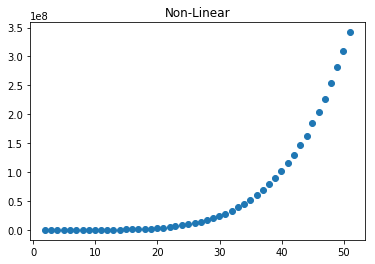

In [23]:
plt.scatter(x1, y1)
plt.title('Non-Linear')

In [21]:
y2 = x*5

Text(0.5,1,'Linear')

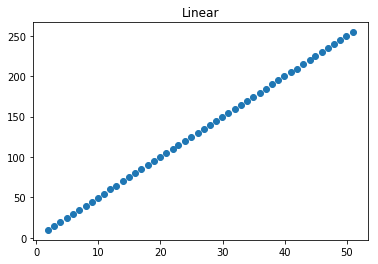

In [24]:
plt.scatter(x1, y2)
plt.title('Linear')

In [32]:
print(f'Pearson R Non-Linear {stats.pearsonr(x1, y1)[0]}')
print(f'Pearson R Linear {stats.pearsonr(x1, y2)[0]}')

Pearson R Non-Linear 0.828846772102173
Pearson R Linear 0.9999967957888769


In [33]:
print(f'Spearman R Non-Linear {stats.spearmanr(x1, y1)[0]}')
print(f'Spearman R Linear {stats.spearmanr(x1, y2)[0]}')

Spearman R Non-Linear 0.9999999999999999
Spearman R Linear 0.9999999999999999


We can easily see that how both coefficients work. Pearson gives better results when we have a linearity involved, so it it counts for a linearity assumption in it's calculation. Where as spearman R only cares about ranking of our variables.

In other words pearson cares about 'how' our variables behave together, is it linearly increasing ? is it exponentially increasing ?

But spearman only carese about whether they monotonicly increase together or not. Which can be best explained taking accounts the rankings of two columns.

### DENDOGRAM

Here we introduce another variable which we will call z1, which is random column. The reason we do this is to have column that have no relationship to x1 and to have a sense how our dendogram forms itself in terms of monotonic relationship (in this case distance defined as 1 - corr)

In [34]:
from scipy.cluster import hierarchy as hc

In [38]:
z1 = np.random.permutation(y2)

In [43]:
df = pd.DataFrame({'x1':x1, 'y1':y1, 'z1':z1})

By looking at this dendogram we can say x1 and y1 are indeed very close in terms of their behavior in the variable space together. How do we know it ? Or why we are not suprise because we created it in terms of x1. So it depends on x1 !!!

Here might go with either with pearson or spearman, but if we go with spearman the non-linearity might effect the distance we observe below. Since we only care about how these variables ranked side by side spearman is way to go. Think of ordinal variables where we only care about levels, which are basically rankings and indeed it will make sense.

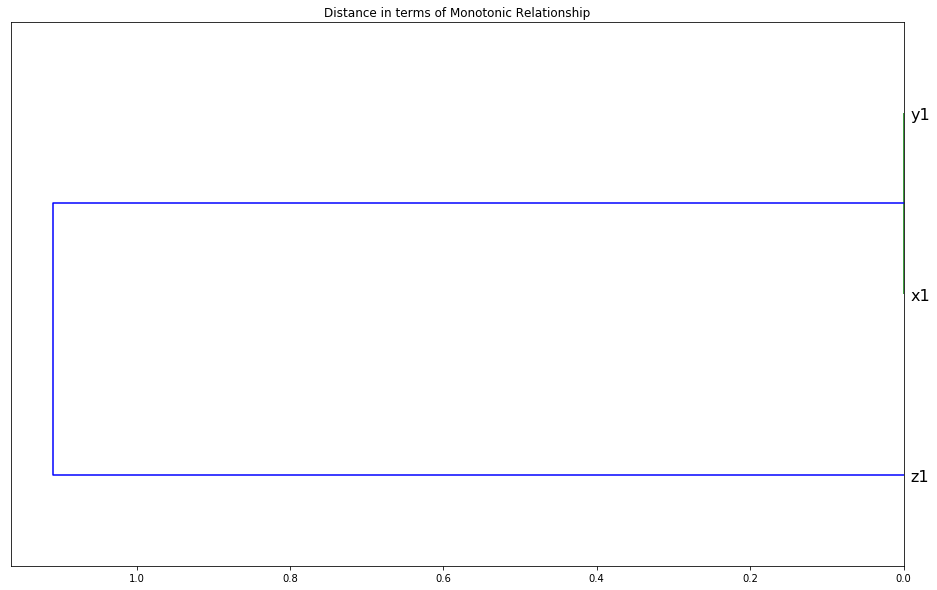

In [47]:
corr = np.round(stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.title('Distance in terms of Monotonic Relationship')
plt.show()